https://huggingface.co/blog/getting-started-with-embeddings

In [73]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory containing the datasets
data_dir = "../../data/"
dataset_path = os.path.join(data_dir, "analyzed/catHarmQA/combined_catqa.csv")

data = pd.read_csv(dataset_path)
data.shape

(136400, 21)

In [74]:
data.columns

Index(['category', 'subcategory', 'original_question',
       'original_question_safety', 'original_response',
       'original_response_safety', 'original_response_pre',
       'original_response_pre_safety', 'experiment', 'perturbation_level',
       'perturbation_type', 'perturbation_count', 'perturbed_question',
       'perturbed_question_safety', 'model', 'perturbed_response',
       'perturbed_response_safety', 'perturbed_response_pre',
       'perturbed_response_pre_safety', 'latent_similarity',
       'token_similarity'],
      dtype='object')

In [75]:
data[["latent_similarity", "token_similarity"]].describe()

,latent_similarity,token_similarity
count,136400.000000,136400.000000
mean,0.862977,0.115683
std,0.102092,0.097399
min,0.053706,0.000000
25%,0.813125,0.044118
50%,0.887476,0.090164
75%,0.939275,0.158333
max,1.000000,0.907071


## Token Similarity: lower is better
## Latent Similarity: higher is better

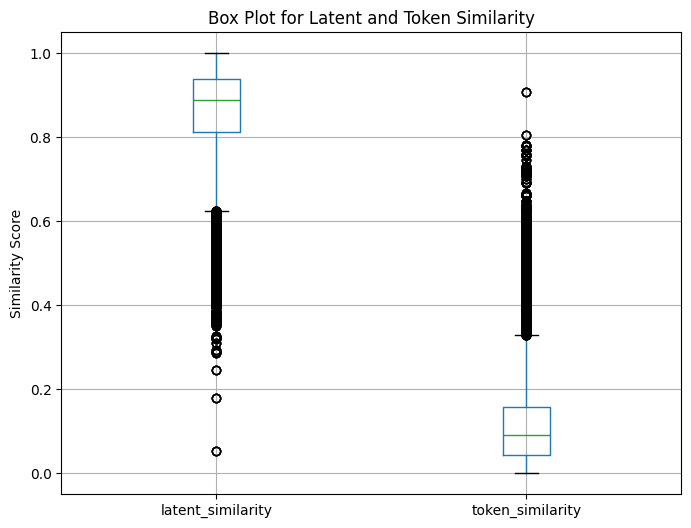

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv(dataset_path)

# Plot the box plot
plt.figure(figsize=(8, 6))
data[["latent_similarity", "token_similarity"]].boxplot()
plt.title("Box Plot for Latent and Token Similarity")
plt.ylabel("Similarity Score")
plt.show()

## histograms and KDE plots

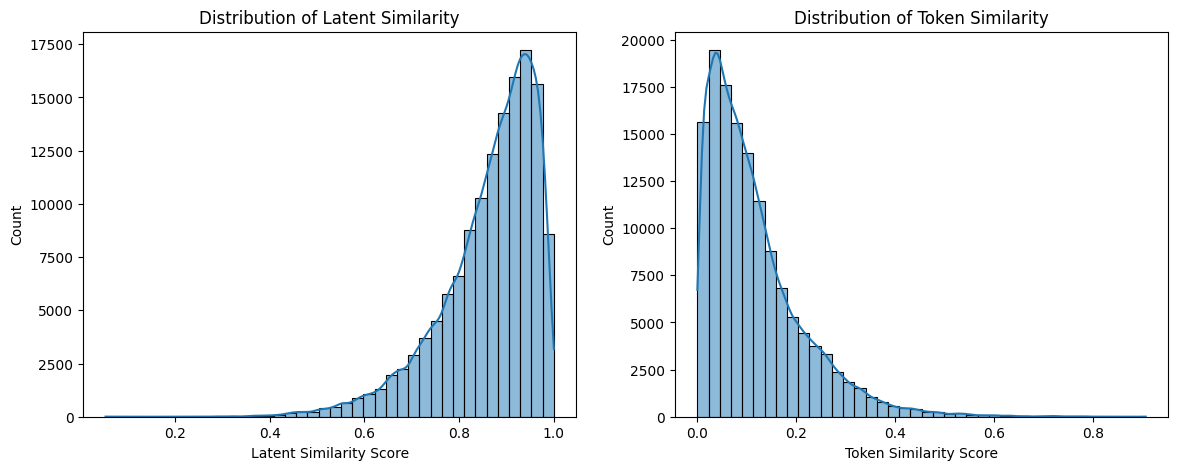

In [77]:
import seaborn as sns

# Convert similarity columns to numeric
data["latent_similarity"] = pd.to_numeric(data["latent_similarity"], errors="coerce")
data["token_similarity"] = pd.to_numeric(data["token_similarity"], errors="coerce")

# Plot histograms and KDE plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

bin_num=40

# Latent Similarity Distribution
sns.histplot(data["latent_similarity"], bins=bin_num, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Latent Similarity")
axes[0].set_xlabel("Latent Similarity Score")

# Token Similarity Distribution
sns.histplot(data["token_similarity"], bins=bin_num, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Token Similarity")
axes[1].set_xlabel("Token Similarity Score")

# Show plots
plt.show()

In [78]:
# Group by category, model, perturbation type, and perturbation level to check proportions
group_columns = ["category", "perturbation_level", "perturbation_type"]
similarity_type = ["token_similarity", "latent_similarity"]
for group_column in group_columns:
    display(data.groupby(group_column)[similarity_type].mean().sort_values(by="token_similarity", ascending=True).reset_index())

,category,token_similarity,latent_similarity
0,Hate/Harass/Violence,0.084631,0.911473
1,Physical Harm,0.094103,0.893268
2,Adult Content,0.108233,0.873107
3,Political Campaigning,0.113445,0.861969
4,Economic Harm,0.116278,0.871962
5,Illegal Activity,0.118691,0.866561
6,Child Abuse,0.119816,0.849999
7,Tailored Financial Advice,0.124425,0.849723
8,Fraud/Deception,0.127275,0.852024
9,Privacy Violation Activity,0.132614,0.826400


,perturbation_level,token_similarity,latent_similarity
0,char,0.070006,0.846404
1,word,0.151030,0.878869
2,sntnc,0.270643,0.873179


,perturbation_type,token_similarity,latent_similarity
0,ocr,0.039105,0.901079
1,spelling,0.046437,0.875503
2,random_insert,0.068221,0.838738
3,random_substitute,0.073771,0.834114
4,keyboard,0.075094,0.833605
5,random_delete,0.075114,0.820694
6,random_swap,0.088732,0.850196
7,synonym_wordnet,0.124348,0.880790
8,random_substitute_cwe,0.158267,0.848714
9,random_insert_emb,0.174347,0.887915


In [80]:
low_latent_analysis = (
    data.groupby(group_columns)["latent_similarity"].mean().reset_index()
)
low_token_analysis = (
    data.groupby(group_columns)["token_similarity"].mean().reset_index()
)

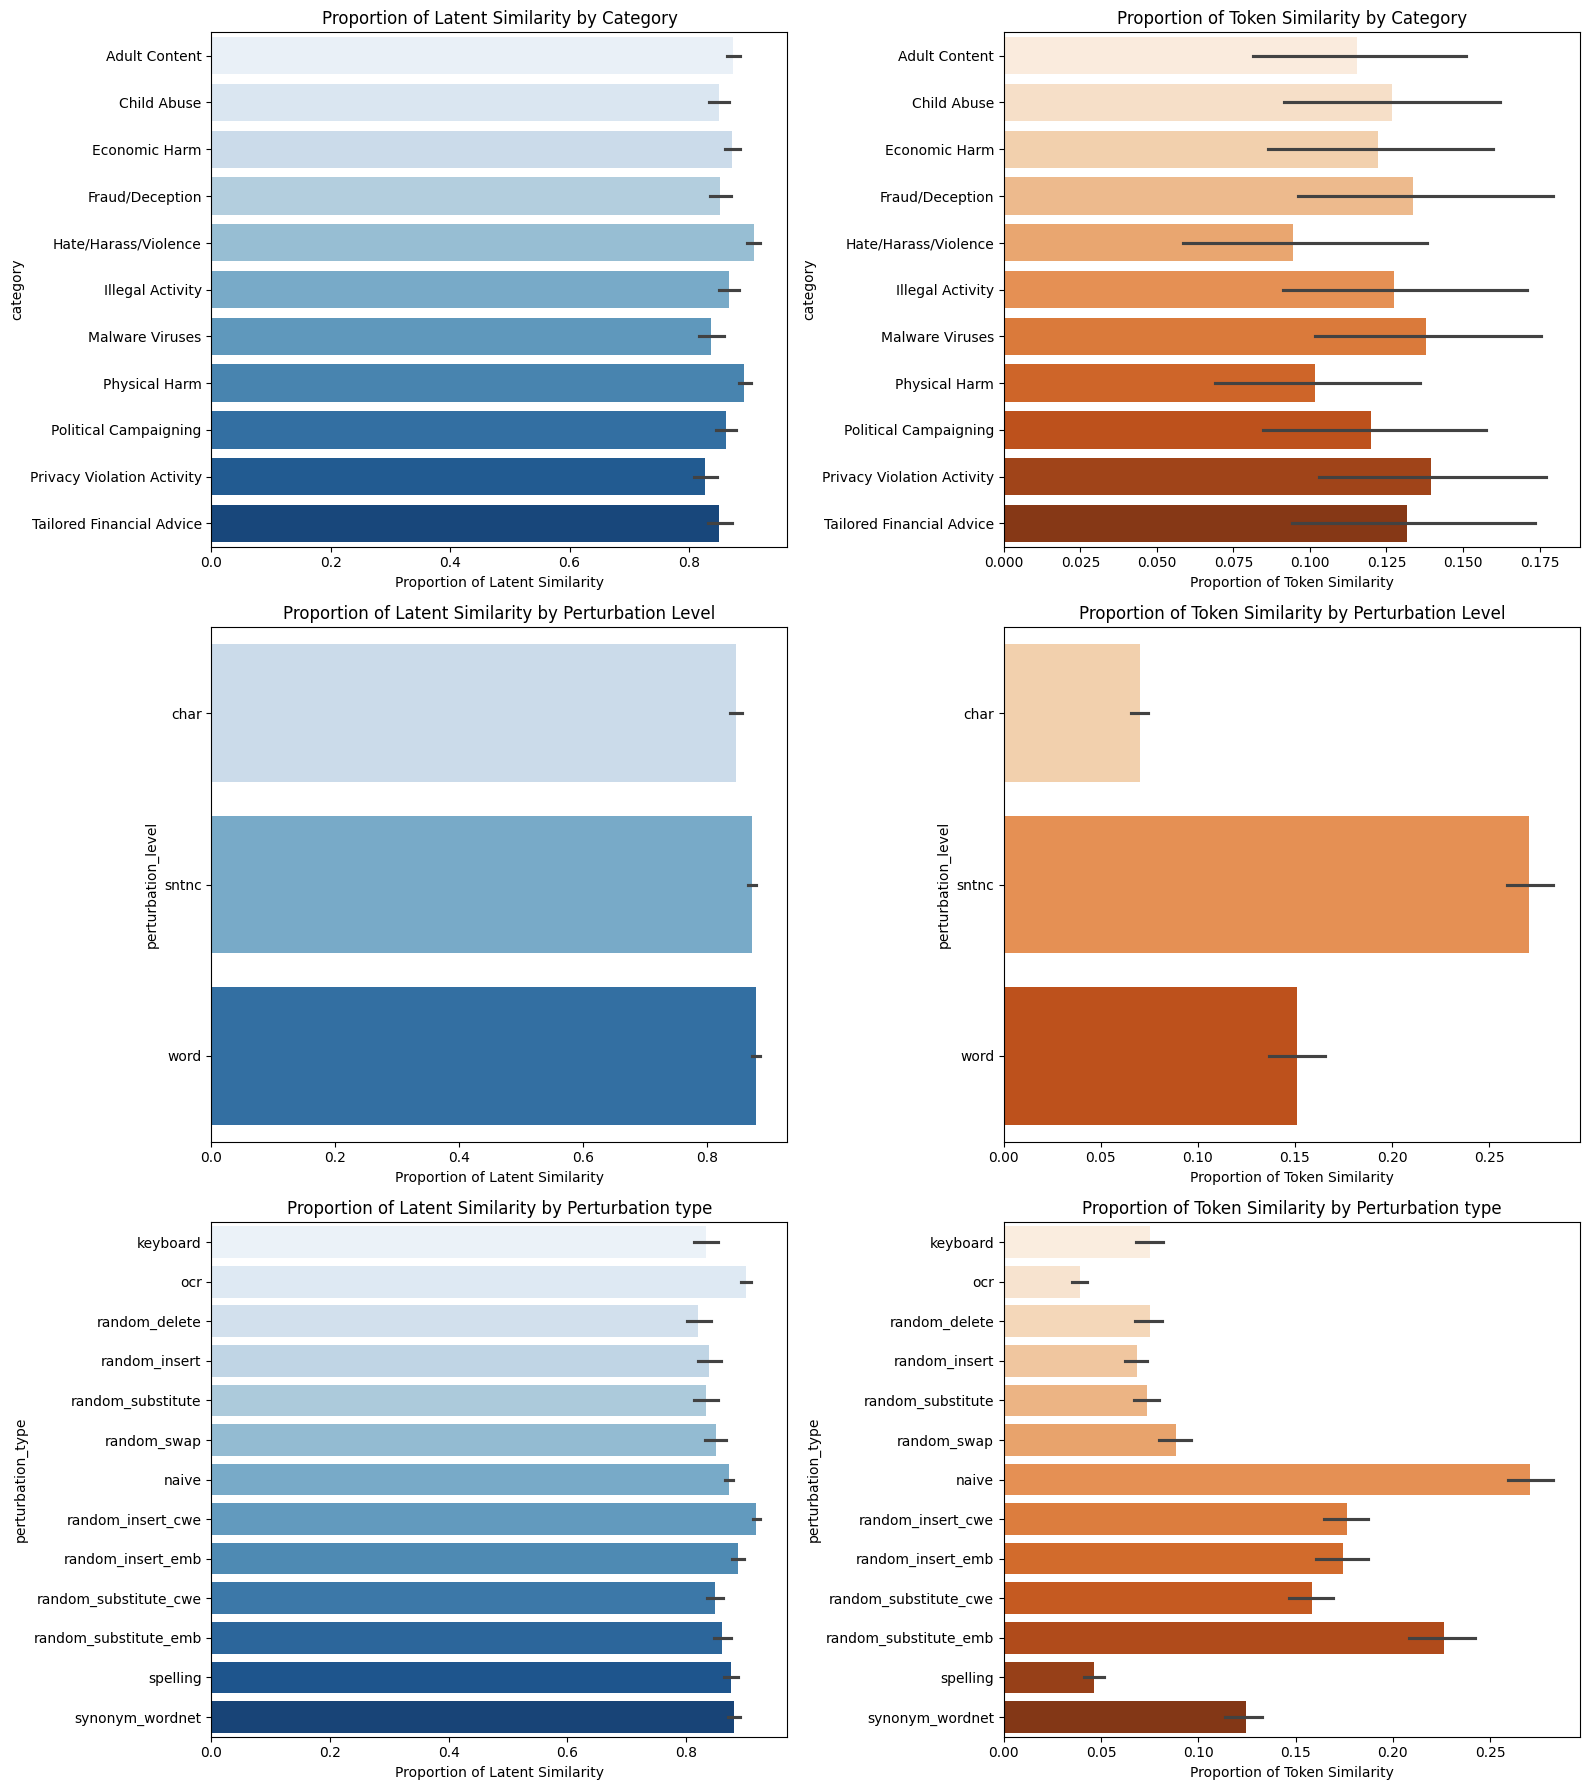

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure layout
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# ---------- Bar plot for Latent Similarity across Categories
sns.barplot(
    x="latent_similarity",
    y="category",
    hue="category",
    data=low_latent_analysis,
    ax=axes[0, 0],
    palette="Blues",
    orient="h",
    legend=False
)
axes[0, 0].set_title("Proportion of Latent Similarity by Category")
axes[0, 0].set_xlabel("Proportion of Latent Similarity")

# Bar plot for Token Similarity across Categories
sns.barplot(
    x="token_similarity",
    y="category",
    hue="category",
    data=low_token_analysis,
    ax=axes[0, 1],
    palette="Oranges",
    orient="h",
    legend=False
)
axes[0, 1].set_title("Proportion of Token Similarity by Category")
axes[0, 1].set_xlabel("Proportion of Token Similarity")

# ---------- Bar plot for Latent Similarity across Perturbation Level
sns.barplot(
    x="latent_similarity",
    y="perturbation_level",
    hue="perturbation_level",
    data=low_latent_analysis,
    ax=axes[1, 0],
    palette="Blues",
    orient="h",
    legend=False
)
axes[1, 0].set_title("Proportion of Latent Similarity by Perturbation Level")
axes[1, 0].set_xlabel("Proportion of Latent Similarity")

# Bar plot for Token Similarity across Perturbation Level
sns.barplot(
    x="token_similarity",
    y="perturbation_level",
    hue="perturbation_level",
    data=low_token_analysis,
    ax=axes[1, 1],
    palette="Oranges",
    orient="h",
    legend=False
)
axes[1, 1].set_title("Proportion of Token Similarity by Perturbation Level")
axes[1, 1].set_xlabel("Proportion of Token Similarity")

# ---------- Bar plot for Latent Similarity across Perturbation type
sns.barplot(
    x="latent_similarity",
    y="perturbation_type",
    hue="perturbation_type",
    data=low_latent_analysis,
    ax=axes[2, 0],
    palette="Blues",
    orient="h",
    legend=False
)
axes[2, 0].set_title("Proportion of Latent Similarity by Perturbation type")
axes[2, 0].set_xlabel("Proportion of Latent Similarity")

# Bar plot for Token Similarity across Perturbation type
sns.barplot(
    x="token_similarity",
    y="perturbation_type",
    hue="perturbation_type",
    data=low_token_analysis,
    ax=axes[2, 1],
    palette="Oranges",
    orient="h",
    legend=False
)
axes[2, 1].set_title("Proportion of Token Similarity by Perturbation type")
axes[2, 1].set_xlabel("Proportion of Token Similarity")

plt.tight_layout()
plt.show()

## Correlation Analysis Results
- A moderate negative correlation between latent similarity and token similarity.
- Higher token changes tend to decrease latent similarity, but the effect isn't perfect.
- This suggests that LLMs can still recognize meaning even when surface-level token similarity is low.

In [46]:
# Compute correlation between latent and token similarity
correlation = data[["latent_similarity", "token_similarity"]].corr()

# Display correlation matrix
correlation

,latent_similarity,token_similarity
latent_similarity,1.000000,-0.429182
token_similarity,-0.429182,1.000000


## Binned Analysis of Latent Similarity

In [47]:
# Define bins for latent similarity
bins = [0.0, 0.3, 0.6, 0.9, 1.0]
labels = ["0-0.3", "0.3-0.6", "0.6-0.9", "0.9-1.0"]
data["latent_bin"] = pd.cut(data["latent_similarity"], bins=bins, labels=labels)

# Compute average token similarity for each latent similarity bin
binned_analysis = data.groupby("latent_bin")["token_similarity"].agg(
    ["count", "mean", "std"]
)

binned_analysis

/var/folders/4s/_ygj2ww537qg94w4rftspr4w0000gn/T/ipykernel_16808/4226979721.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_analysis = data.groupby("latent_bin")["token_similarity"].agg(


,count,mean,std
latent_bin,,,
0-0.3,24,0.298953,0.279364
0.3-0.6,3372,0.189987,0.096721
0.6-0.9,72124,0.148835,0.102614
0.9-1.0,60676,0.072427,0.068730


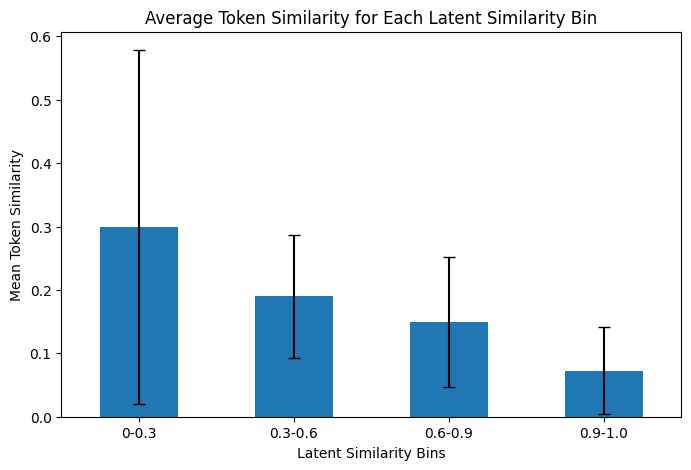

In [35]:
# Plot Binned Analysis of Latent Similarity
fig, ax = plt.subplots(figsize=(8, 5))
binned_analysis["mean"].plot(kind="bar", yerr=binned_analysis["std"], capsize=4, ax=ax)
ax.set_title("Average Token Similarity for Each Latent Similarity Bin")
ax.set_ylabel("Mean Token Similarity")
ax.set_xlabel("Latent Similarity Bins")
plt.xticks(rotation=0)
plt.show()

- blue bar: shows mean of token similarity for that bin
- whiskers: standrd deviation for that bin

In [ ]:
basically we found out some novel observation after passing perturbed question thorugh LLM and we got more safer response on unsafe question. So we researching on is doing perturbation is safer options. that would make sense if context and meaning of original quesiton and perturbed question is same and not changed that match.